pip install lableme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [ ]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations


In [16]:
import os
import time
import uuid
import cv2


In [54]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

Camera should be notificate to user when want to open and start capture

In [55]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collectiong image {}'.format(imgnum))
    ret,frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame', frame)
    time.sleep(1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Collectiong image 0
Collectiong image 1


1   HIToolbox                           0x00007ff82298152b _ZN15MenuBarInstance21IsAutoShowHideAllowedEv + 259
2   HIToolbox                           0x00007ff82287a33e _ZN15MenuBarInstance24UpdateAutoShowVisibilityE5Pointh + 34
3   HIToolbox                           0x00007ff82287a2b3 _ZN15MenuBarInstance14EnableAutoShowEv + 47
4   HIToolbox                           0x00007ff82281e908 SetMenuBarObscured + 408
5   HIToolbox                           0x00007ff82281e4ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
6   HIToolbox                           0x00007ff822818996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
7   HIToolbox                           0x00007ff8227e0bd2 _NotifyEventLoopObservers + 153
8   HIToolbox                           0x00007ff8228183e6 AcquireEventFromQueue + 494
9   HIToolbox                           0x00007ff8228073ec ReceiveNextEventCommon + 285
10  HIToolbox                           0x00007ff8228072b3

Collectiong image 2
Collectiong image 3
Collectiong image 4
Collectiong image 5
Collectiong image 6
Collectiong image 7
Collectiong image 8
Collectiong image 9
Collectiong image 10
Collectiong image 11
Collectiong image 12
Collectiong image 13
Collectiong image 14
Collectiong image 15
Collectiong image 16
Collectiong image 17
Collectiong image 18
Collectiong image 19
Collectiong image 20
Collectiong image 21
Collectiong image 22
Collectiong image 23
Collectiong image 24
Collectiong image 25
Collectiong image 26
Collectiong image 27
Collectiong image 28
Collectiong image 29


: 

#dont forget to code turning of camera

In [1]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

In [4]:
images.as_numpy_iterator().next()

b'data/images/22fbd63c-a2f6-11ed-a074-2ea0c7643441.jpg'

In [5]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [6]:
images = images.map(load_image)

In [7]:
images.as_numpy_iterator().next()

array([[[ 5,  6,  8],
        [10, 11, 13],
        [ 6,  7,  9],
        ...,
        [ 8, 17, 22],
        [ 5, 14, 19],
        [ 9, 18, 23]],

       [[ 4,  5,  7],
        [ 8,  9, 11],
        [ 9, 10, 12],
        ...,
        [ 5, 14, 19],
        [10, 19, 24],
        [ 4, 13, 18]],

       [[ 5,  6,  8],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [ 8, 17, 22],
        [11, 20, 25],
        [ 1, 10, 15]],

       ...,

       [[ 7,  8, 10],
        [ 5,  6,  8],
        [ 7,  8, 10],
        ...,
        [20, 31, 37],
        [24, 35, 41],
        [22, 33, 39]],

       [[ 4,  5,  7],
        [ 6,  7,  9],
        [ 8,  9, 11],
        ...,
        [16, 27, 33],
        [20, 31, 37],
        [19, 30, 36]],

       [[ 4,  5,  7],
        [ 6,  7,  9],
        [ 6,  7,  9],
        ...,
        [18, 29, 35],
        [24, 35, 41],
        [21, 32, 38]]], dtype=uint8)

In [8]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [9]:
image_generator = images.batch(4).as_numpy_iterator()

In [10]:
plot_images = image_generator.next()

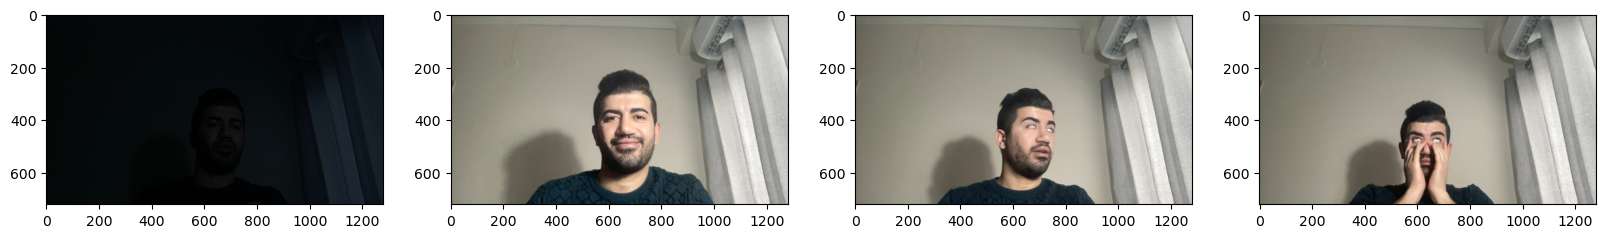

In [11]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [13]:
90*.7 # 62 to train

62.99999999999999

In [21]:
90*.15 #  12 in test and val

13.5

In [22]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [23]:
import albumentations as alb

In [24]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
alb.HorizontalFlip(p=0.5),
alb.RandomBrightnessContrast(p=0.2),
alb.RandomGamma(p=0.2),
alb.RGBShift(p=0.2),
alb.VerticalFlip(p=0.5)],
bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [25]:
img =cv2.imread(os.path.join('data','train','images','2a9fdcc6-a2f6-11ed-a074-2ea0c7643441.jpg'))

In [28]:
img

array([[[113, 125, 131],
        [110, 122, 128],
        [114, 126, 132],
        ...,
        [200, 210, 217],
        [205, 215, 222],
        [183, 195, 201]],

       [[112, 124, 130],
        [110, 122, 128],
        [114, 126, 132],
        ...,
        [201, 211, 218],
        [206, 216, 223],
        [193, 205, 211]],

       [[114, 126, 132],
        [112, 124, 130],
        [116, 128, 134],
        ...,
        [201, 212, 216],
        [205, 215, 222],
        [193, 205, 211]],

       ...,

       [[126, 136, 143],
        [126, 136, 143],
        [122, 132, 139],
        ...,
        [ 27,  22,  23],
        [ 28,  23,  24],
        [ 22,  17,  18]],

       [[129, 139, 146],
        [131, 141, 148],
        [124, 133, 142],
        ...,
        [ 51,  46,  47],
        [ 45,  40,  41],
        [ 64,  59,  60]],

       [[126, 136, 143],
        [133, 143, 150],
        [127, 136, 145],
        ...,
        [ 39,  34,  35],
        [ 46,  41,  42],
        [ 31,  26,  27]]

In [32]:
with open(os.path.join('data', 'train', 'labels', '2a9fdcc6-a2f6-11ed-a074-2ea0c7643441.json'), 'r') as f:
    label = json.load(f)

In [33]:
label['shapes'][0]['points']

[[441.26582278481015, 47.341772151898795],
 [815.9493670886076, 472.6582278481013]]

In [34]:
label['shapes'][0]['label']

'face'

In [35]:
croods = [0,0,0,0]
croods[0] = label['shapes'][0]['points'][0][0]
croods[1] = label['shapes'][0]['points'][0][1]
croods[2] = label['shapes'][0]['points'][1][0]
croods[3] = label['shapes'][0]['points'][1][1]

In [36]:
croods

[441.26582278481015, 47.341772151898795, 815.9493670886076, 472.6582278481013]